**Chapter 8**

**Introduction
to Deep Learning
for Computer Vision**

Computer vision is the earliest and biggest success story of deep learning. Every
day, you’re interacting with deep vision models—via Google Photos, Google image
search, YouTube, video filters in camera apps, OCR software, and many more.

- Convolutional Neural Networks, also known as convnets,
    the
type of deep learning model that is now used almost universally in computer vision
applications.

1. **Introduction to Convnets**
    
    It’s a stack of Conv2D
and MaxPooling2D layers.

Conv2D layers are generally used for achieving high accuracy in image recognition tasks.

Max pooling operation for 2D spatial data. Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size ) for each channel of the input.

1.1 **Instantiating a small convnet**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

- Importantly, a convnet takes as input tensors of shape (image_height, image_width,
image_channels), not including the batch dimension.

The architecture of our convnet.

**1.2 model Summary**

In [3]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

- You can see that the output of every Conv2D and MaxPooling2D layer is a rank-3 tensor
of shape (height, width, channels). The width and height dimensions tend to
shrink as you go deeper in the model. The number of channels is controlled by the
first argument passed to the Conv2D layers (32, 64, or 128).

After the last Conv2D layer, we end up with an output of shape (3, 3, 128)—a 3 × 3
feature map of 128 channels.

The next step is to feed this output into a densely connected
classifier ( These
classifiers process vectors, which are 1D) . (a stack of **Dense layers**) 

- A dense layer is a layer that is deeply connected with its preceding layer which means the neurons of the layer are connected to every neuron of its preceding layer.
 - current output is a rank-3 tensor. So we use **Flatten layer** (flatten the 3D outputs to 1D)  before adding
the Dense layers.



**1.3 Training the convnet on MNIST images**


In [4]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/5
938/938 [==============================] - 54s 57ms/step - loss: 0.1567 - accuracy: 0.9528
Epoch 2/5
938/938 [==============================] - 52s 56ms/step - loss: 0.0437 - accuracy: 0.9867
Epoch 3/5
938/938 [==============================] - 52s 56ms/step - loss: 0.0299 - accuracy: 0.9910
Epoch 4/5
938/938 [==============================] - 52s 56ms/step - loss: 0.0229 - accuracy: 0.9927
Epoch 5/5
938/938 [==============================] - 52s 56ms/step - loss: 0.0169 - accuracy: 0.9948


**1.4 Evaluating the convnet**

In [5]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 3s 10ms/step - loss: 0.0317 - accuracy: 0.9912
Test accuracy: 0.991


**2.0 The Convolution Operation**

The fundamental difference between a densely connected layer and a convolution
layer is this: Dense layers learn global patterns in their input feature space
whereas convolution layers learn
local patterns

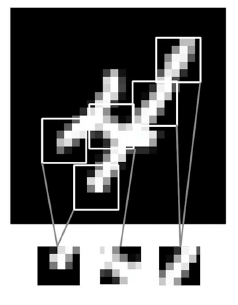
Figure 8.1 Images can be broken
into local patterns such as edges,
textures, and so on.

This key characteristic gives convnets two interesting properties

- The patterns they learn are translation-invariant:

After learning a certain pattern in
the lower-right corner of a picture, a convnet can recognize it anywhere: for
example, in the upper-left corner. A densely connected model would have to
learn the pattern anew if it appeared at a new location. This makes convnets
data-efficient when processing images. they need fewer training samples to learn representations
that have generalization power.

- They can learn spatial hierarchies of patterns:

A first convolution layer will learn
small local patterns such as edges, a second convolution layer will learn larger
patterns made of the features of the first layers. This
allows convnets to efficiently learn increasingly complex and abstract visual concepts,
because the visual world is fundamentally spatially hierarchical.

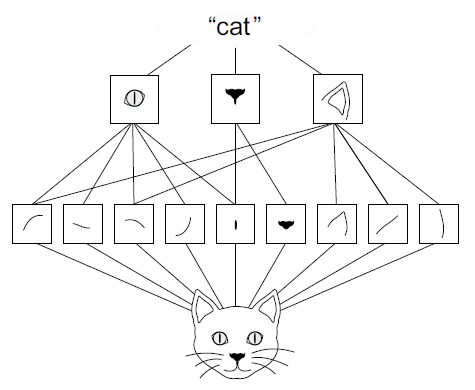

-Convolutions operate over rank-3 tensors called feature maps, with two spatial axes
(height and width) as well as a depth axis (also called the channels axis).

- For an RGB
image, the dimension of the depth axis is 3, because the image has three color channels:
red, green, and blue. For a black-and-white picture, like the MNIST digits, the
depth is 1 (levels of gray).

- The convolution operation extracts patches from its input
feature map and applies the same transformation to all of these patches, producing
an output feature map.

- This output feature map is still a rank-3 tensor: it has a width and a height. Its depth can be arbitrary

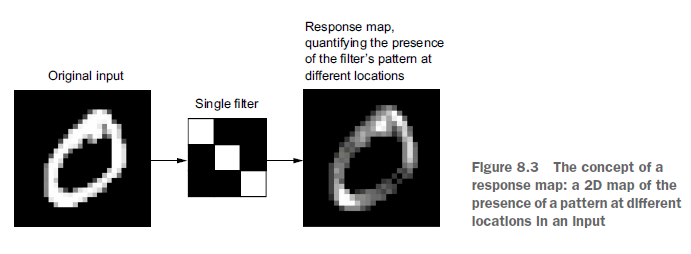

- Convolutions are defined by two key parameters:
    - Size of the patches extracted from the inputs—These are typically 3 × 3 or 5 × 5. In the
example, they were 3 × 3, which is a common choice.
    - Depth of the output feature map—This is the number of filters computed by the convolution.
The example started with a depth of 32 and ended with a depth of 64.


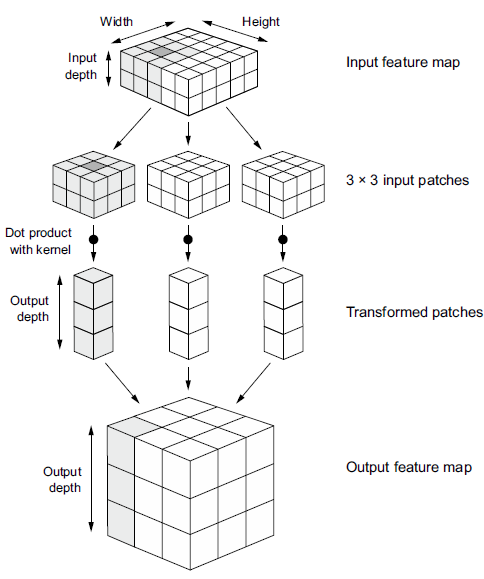



**2.1 The max-pooling operation**

MaxPooling2D layer halved the size of the feature maps. For instance, before the first MaxPooling2D layers,
the feature map is 26 × 26, but the max-pooling operation halves it to 13 × 13.

A big difference from convolution is that max pooling is usually done
with 2 × 2 windows and stride 2, in order to downsample the feature maps by a factor
of 2. On the other hand, convolution is typically done with 3 × 3 windows and no
stride (stride 1).

**2.2 An incorrectly structured convnet missing its max-pooling layers**


In [12]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model1 = keras.Model(inputs=inputs, outputs=outputs)

In [13]:
model1.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 conv2d_14 (Conv2D)          (None, 22, 22, 128)       73856     
                                                                 
 flatten_4 (Flatten)         (None, 61952)             0         
                                                                 
 dense_4 (Dense)             (None, 10)                619530    
                                                                 
Total params: 712,202
Trainable params: 712,202
Non-trainab

What’s wrong with this setup?

The final feature map has 22 × 22 × 128 = 61,952 total coefficients per sample.
This is huge. When you flatten it to stick a Dense layer of size 10 on top, that
layer would have over half a million parameters. This is far too large for such a
small model and would result in intense overfitting.

**3.0 Training a convnet from scratch on a small dataset**

3.1 **Downloading the data**

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jafarali110","key":"e4d5c1c52d01cca7c37040e97e43ade7"}'}

In [3]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
!echo '{"username":"jafarali110","key":"e4d5c1c52d01cca7c37040e97e43ade7"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
 
!kaggle competitions download -c dogs-vs-cats

 98% 796M/812M [00:03<00:00, 242MB/s]
100% 812M/812M [00:03<00:00, 240MB/s]


In [4]:
!unzip -qq dogs-vs-cats.zip

In [5]:
!unzip -qq train.zip

**Listing 8.6** **Copying images to training, validation, and test directories**

In [6]:
import os, shutil, pathlib
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")
def make_subset(subset_name, start_index, end_index):
  for category in ("cat", "dog"):
    dir = new_base_dir / subset_name / category
    os.makedirs(dir)
    fnames = [f"{category}.{i}.jpg"
              for i in range(start_index, end_index)]
    for fname in fnames:
        shutil.copyfile(src=original_dir / fname,
                                        dst=dir / fname)
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

L**isting 8.7 Instantiating a small convnet for dogs vs. cats classification**

In [8]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model= keras.Model(inputs=inputs, outputs=outputs)

In [9]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

**Listing 8.8 Configuring the model for training**

In [10]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
               metrics=["accuracy"])

**3.2 Data Preprocessing**

1 Read the picture files.

2 Decode the JPEG content to RGB grids of pixels.

3 Convert these into floating-point tensors.

4 Resize them to a shared size (we’ll use 180 × 180).

5 Pack them into batches (we’ll use batches of 32 images).

**Listing 8.9 Using image_dataset_from_directory to read images**

In [11]:
from tensorflow.keras.utils import image_dataset_from_directory
train_dataset = image_dataset_from_directory(
 new_base_dir / "train",
 image_size=(180, 180),
 batch_size=32)
validation_dataset = image_dataset_from_directory(
 new_base_dir / "validation",
 image_size=(180, 180),
 batch_size=32)
test_dataset = image_dataset_from_directory(
 new_base_dir / "test",
 image_size=(180, 180),
 batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


**Listing 8.10 Displaying the shapes of the data and labels yielded by the Dataset**

In [12]:
for data_batch, labels_batch in train_dataset:
  print("data batch shape:", data_batch.shape)
  print("labels batch shape:", labels_batch.shape)
  break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


we’ll also use a ModelCheckpoint callback to save the model after each
epoch.We’ll configure it with the path specifying where to save the file, as well as the
arguments save_best_only=True and monitor="val_loss": they tell the callback to
only save a new file. when the current value of the
val_loss metric is lower than at any previous time during training. This guarantees
that your saved file will always contain the state of the model corresponding to its bestperforming
training epoch, in terms of its performance on the validation data

**Listing 8.11 Fitting the model using a Dataset**

In [13]:
callbacks = [
 keras.callbacks.ModelCheckpoint(
 filepath="convnet_from_scratch.keras",
 save_best_only=True,
 monitor="val_loss") ]

In [14]:
history = model.fit(
 train_dataset,
 epochs=30,
 validation_data=validation_dataset,
 callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 20s 126ms/step - loss: 0.7158 - accuracy: 0.5240 - val_loss: 0.6924 - val_accuracy: 0.5010
Epoch 2/30
63/63 [==============================] - 7s 112ms/step - loss: 0.6920 - accuracy: 0.5195 - val_loss: 0.6787 - val_accuracy: 0.5880
Epoch 3/30
63/63 [==============================] - 7s 110ms/step - loss: 0.6684 - accuracy: 0.5775 - val_loss: 0.8686 - val_accuracy: 0.5290
Epoch 4/30
63/63 [==============================] - 8s 119ms/step - loss: 0.6427 - accuracy: 0.6390 - val_loss: 0.6148 - val_accuracy: 0.6560
Epoch 5/30
63/63 [==============================] - 7s 113ms/step - loss: 0.6014 - accuracy: 0.6860 - val_loss: 0.5758 - val_accuracy: 0.6910
Epoch 6/30
63/63 [==============================] - 7s 110ms/step - loss: 0.5718 - accuracy: 0.7045 - val_loss: 0.8489 - val_accuracy: 0.6560
Epoch 7/30
63/63 [==============================] - 7s 111ms/step - loss: 0.5437 - accuracy: 0.7215 - val_loss: 0.6320 - val_accuracy: 0.7020
Epoch

Epoch 1/30
63/63 [==============================] - 20s 126ms/step - loss: 0.7158 - accuracy: 0.5240 - val_loss: 0.6924 - val_accuracy: 0.5010

Epoch 2/30
63/63 [==============================] - 7s 112ms/step - loss: 0.6920 - accuracy: 0.5195 - val_loss: 0.6787 - val_accuracy: 0.5880

Epoch 3/30
63/63 [==============================] - 7s 110ms/step - loss: 0.6684 - accuracy: 0.5775 - val_loss: 0.8686 - val_accuracy: 0.5290

Epoch 4/30
63/63 [==============================] - 8s 119ms/step - loss: 0.6427 - accuracy: 0.6390 - val_loss: 0.6148 - val_accuracy: 0.6560

Epoch 5/30
63/63 [==============================] - 7s 113ms/step - loss: 0.6014 - accuracy: 0.6860 - val_loss: 0.5758 - val_accuracy: 0.6910

Epoch 6/30
63/63 [==============================] - 7s 110ms/step - loss: 0.5718 - accuracy: 0.7045 - val_loss: 0.8489 - val_accuracy: 0.6560

Epoch 7/30
63/63 [==============================] - 7s 111ms/step - loss: 0.5437 - accuracy: 0.7215 - val_loss: 0.6320 - val_accuracy: 0.7020

Epoch 8/30
63/63 [==============================] - 7s 111ms/step - loss: 0.5115 - accuracy: 0.7460 - val_loss: 0.7441 - val_accuracy: 0.6650

Epoch 9/30
63/63 [==============================] - 7s 112ms/step - loss: 0.4690 - accuracy: 0.7695 - val_loss: 0.5973 - val_accuracy: 0.7190

Epoch 10/30
63/63 [==============================] - 7s 111ms/step - loss: 0.4336 - accuracy: 0.8055 - val_loss: 0.7174 - val_accuracy: 0.6980

Epoch 11/30
63/63 [==============================] - 7s 112ms/step - loss: 0.3728 - accuracy: 0.8275 - val_loss: 0.6667 - val_accuracy: 0.7420

Epoch 12/30
63/63 [==============================] - 7s 111ms/step - loss: 0.3396 - accuracy: 0.8515 - val_loss: 0.6869 - val_accuracy: 0.7290

Epoch 13/30
63/63 [==============================] - 7s 111ms/step - loss: 0.2877 - accuracy: 0.8735 - val_loss: 0.7763 - val_accuracy: 0.7410

Epoch 14/30
63/63 [==============================] - 7s 112ms/step - loss: 0.2626 - accuracy: 0.8920 - val_loss: 0.9315 - val_accuracy: 0.7300

Epoch 15/30
63/63 [==============================] - 7s 113ms/step - loss: 0.1919 - accuracy: 0.9220 - val_loss: 0.9434 - val_accuracy: 0.7410

Epoch 16/30
63/63 [==============================] - 7s 111ms/step - loss: 0.1729 - accuracy: 0.9365 - val_loss: 0.9975 - val_accuracy: 0.7350

Epoch 17/30
63/63 [==============================] - 7s 112ms/step - loss: 0.1163 - accuracy: 0.9565 - val_loss: 0.8713 - val_accuracy: 0.7530

Epoch 18/30
63/63 [==============================] - 7s 113ms/step - loss: 0.1165 - accuracy: 0.9570 - val_loss: 1.0517 - val_accuracy: 0.7450

Epoch 19/30
63/63 [==============================] - 7s 111ms/step - loss: 0.0872 - accuracy: 0.9710 - val_loss: 1.1460 - val_accuracy: 0.7500

Epoch 20/30
63/63 [==============================] - 7s 113ms/step - loss: 0.0805 - accuracy: 0.9715 - val_loss: 1.2180 - val_accuracy: 0.7630

Epoch 21/30
63/63 [==============================] - 7s 112ms/step - loss: 0.0750 - accuracy: 0.9765 - val_loss: 1.3451 - val_accuracy: 0.7670

Epoch 22/30
63/63 [==============================] - 7s 112ms/step - loss: 0.0718 - accuracy: 0.9755 - val_loss: 1.4192 - val_accuracy: 0.7530

Epoch 23/30
63/63 [==============================] - 7s 111ms/step - loss: 0.0670 - accuracy: 0.9780 - val_loss: 1.3073 - val_accuracy: 0.7620

Epoch 24/30
63/63 [==============================] - 7s 112ms/step - loss: 0.0655 - accuracy: 0.9825 - val_loss: 1.3440 - val_accuracy: 0.7750

Epoch 25/30
63/63 [==============================] - 7s 112ms/step - loss: 0.0700 - accuracy: 0.9820 - val_loss: 1.7553 - val_accuracy: 0.6870

Epoch 26/30
63/63 [==============================] - 7s 113ms/step - loss: 0.0379 - accuracy: 0.9845 - val_loss: 1.7994 - val_accuracy: 0.7470

Epoch 27/30
63/63 [==============================] - 7s 112ms/step - loss: 0.0895 - accuracy: 0.9760 - val_loss: 1.7412 - val_accuracy: 0.7500

Epoch 28/30
63/63 [==============================] - 7s 111ms/step - loss: 0.0371 - accuracy: 0.9880 - val_loss: 1.5278 - val_accuracy: 0.7510

Epoch 29/30
63/63 [==============================] - 7s 112ms/step - loss: 0.0475 - accuracy: 0.9830 - val_loss: 1.7451 - val_accuracy: 0.7710

Epoch 30/30
63/63 [==============================] - 7s 112ms/step - loss: 0.0431 - accuracy: 0.9860 - val_loss: 1.7680 - val_accuracy: 0.7470

**Listing 8.12 Displaying curves of loss and accuracy during training**

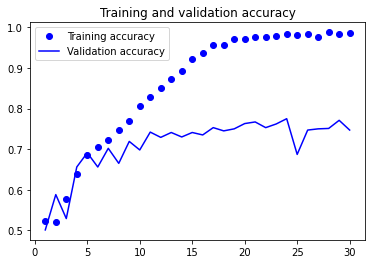

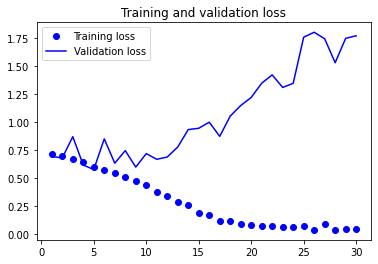

In [15]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

These plots are characteristic of overfitting. The training accuracy increases linearly
over time, until it reaches nearly 100%, whereas the validation accuracy peaks at 75%.
The validation loss reaches its minimum after only ten epochs and then stalls, whereas
the training loss keeps decreasing linearly as training proceeds.

**Listing 8.13 Evaluating the model on the test set**

In [16]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset) 
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 4s 52ms/step - loss: 0.5925 - accuracy: 0.6835
Test accuracy: 0.683


- Because we have relatively few training samples (2,000), overfitting will be our
number one concern. You already know about a number of techniques that can help
mitigate overfitting, such as dropout and weight decay

**4.0 Using data augmentation**
- Data augmentation takes the approach of generating more training data
from existing training samples by augmenting the samples via a number of random
transformations that yield believable-looking images. The goal is that, at training time,
your model will never see the exact same picture twice.

- This can be done by adding a number of data augmentation layers at the
start of your model right
before the Rescaling layer.

**Listing 8.14 Define a data augmentation stage to add to an image model**

In [17]:
data_augmentation = keras.Sequential(
 [
 layers.RandomFlip("horizontal"),
 layers.RandomRotation(0.1),
 layers.RandomZoom(0.2),
 ]
)

- RandomFlip("horizontal")—Applies horizontal flipping to a random 50% of
the images that go through it

- RandomRotation(0.1)—Rotates the input images by a random value in the range
[–10%, +10%] (these are fractions of a full circle—in degrees, the range would
be [–36 degrees, +36 degrees])

- RandomZoom(0.2)—Zooms in or out of the image by a random factor in the
range [-20%, +20%]

**Listing 8.15 Displaying some randomly augmented training images**

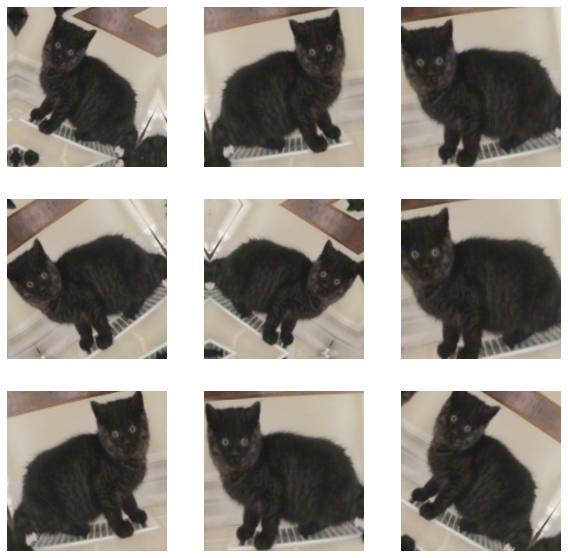

In [18]:
plt.figure(figsize=(10, 10)) 
for images, _ in train_dataset.take(1): 
 for i in range(9):
  augmented_images = data_augmentation(images) 
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_images[0].numpy().astype("uint8")) 
  plt.axis("off")

**Listing 8.16 Defining a new convnet that includes image augmentation and dropout**

If we train a new model using this data-augmentation configuration, the model will
never see the same input twice. But the inputs it sees are still heavily intercorrelated because they come from a small number of original images. As such, this may not be enough
to completely get rid of overfitting. To further fight overfitting, we’ll also add a Dropout
layer to our model right before the densely connected classifier.

In [19]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss="binary_crossentropy",
 optimizer="rmsprop",
 metrics=["accuracy"])

Let’s train the model using data augmentation and dropout. Because we expect overfitting
to occur much later during training

**Listing 8.17 Training the regularized convnet**

Train the model using data augmentation and dropout. Because we expect overfitting
to occur much later during training, we will train for three times as many
epochs—one hundred.

In [20]:
callbacks = [
 keras.callbacks.ModelCheckpoint(
 filepath="convnet_from_scratch_with_augmentation.keras",
 save_best_only=True,
 monitor="val_loss") ]
history = model.fit(
 train_dataset,
 epochs=100,
 validation_data=validation_dataset,
 callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 10s 123ms/step - loss: 0.7307 - accuracy: 0.5010 - val_loss: 0.6923 - val_accuracy: 0.5050
Epoch 2/100
63/63 [==============================] - 8s 118ms/step - loss: 0.7126 - accuracy: 0.5245 - val_loss: 0.7031 - val_accuracy: 0.5000
Epoch 3/100
63/63 [==============================] - 8s 119ms/step - loss: 0.7012 - accuracy: 0.5270 - val_loss: 0.6926 - val_accuracy: 0.5090
Epoch 4/100
63/63 [==============================] - 8s 119ms/step - loss: 0.6960 - accuracy: 0.5725 - val_loss: 0.6678 - val_accuracy: 0.5950
Epoch 5/100
63/63 [==============================] - 8s 119ms/step - loss: 0.6621 - accuracy: 0.6200 - val_loss: 0.6230 - val_accuracy: 0.6480
Epoch 6/100
63/63 [==============================] - 8s 118ms/step - loss: 0.6558 - accuracy: 0.6380 - val_loss: 1.2534 - val_accuracy: 0.5280
Epoch 7/100
63/63 [==============================] - 8s 118ms/step - loss: 0.6117 - accuracy: 0.6765 - val_loss: 0.8437 - val_accuracy: 0.631

Epoch 1/100
63/63 [==============================] - 10s 123ms/step - loss: 0.7307 - accuracy: 0.5010 - val_loss: 0.6923 - val_accuracy: 0.5050

Epoch 2/100
63/63 [==============================] - 8s 118ms/step - loss: 0.7126 - accuracy: 0.5245 - val_loss: 0.7031 - val_accuracy: 0.5000

Epoch 3/100
63/63 [==============================] - 8s 119ms/step - loss: 0.7012 - accuracy: 0.5270 - val_loss: 0.6926 - val_accuracy: 0.5090

Epoch 4/100
63/63 [==============================] - 8s 119ms/step - loss: 0.6960 - accuracy: 0.5725 - val_loss: 0.6678 - val_accuracy: 0.5950

Epoch 5/100
63/63 [==============================] - 8s 119ms/step - loss: 0.6621 - accuracy: 0.6200 - val_loss: 0.6230 - val_accuracy: 0.6480

Epoch 6/100
63/63 [==============================] - 8s 118ms/step - loss: 0.6558 - accuracy: 0.6380 - val_loss: 1.2534 - val_accuracy: 0.5280

Epoch 7/100
63/63 [==============================] - 8s 118ms/step - loss: 0.6117 - accuracy: 0.6765 - val_loss: 0.8437 - val_accuracy: 0.6310

Epoch 8/100
63/63 [==============================] - 8s 118ms/step - loss: 0.6071 - accuracy: 0.6670 - val_loss: 0.6232 - val_accuracy: 0.6230

Epoch 9/100
63/63 [==============================] - 8s 120ms/step - loss: 0.5973 - accuracy: 0.6790 - val_loss: 0.5913 - val_accuracy: 0.6840

Epoch 10/100
63/63 [==============================] - 8s 119ms/step - loss: 0.5697 - accuracy: 0.6980 - val_loss: 0.5618 - val_accuracy: 0.7080

Epoch 11/100
63/63 [==============================] - 8s 118ms/step - loss: 0.5617 - accuracy: 0.7030 - val_loss: 0.5272 - val_accuracy: 0.7390

Epoch 12/100
63/63 [==============================] - 8s 118ms/step - loss: 0.5552 - accuracy: 0.7155 - val_loss: 0.5744 - val_accuracy: 0.7230

Epoch 13/100
63/63 [==============================] - 8s 118ms/step - loss: 0.5326 - accuracy: 0.7355 - val_loss: 0.7351 - val_accuracy: 0.6670

Epoch 14/100
63/63 [==============================] - 8s 120ms/step - loss: 0.5388 - accuracy: 0.7300 - val_loss: 0.5670 - val_accuracy: 0.7010

Epoch 15/100
63/63 [==============================] - 8s 118ms/step - loss: 0.5175 - accuracy: 0.7555 - val_loss: 0.6493 - val_accuracy: 0.7010

Epoch 16/100
63/63 [==============================] - 8s 119ms/step - loss: 0.4984 - accuracy: 0.7605 - val_loss: 0.7813 - val_accuracy: 0.6490

Epoch 17/100
63/63 [==============================] - 8s 118ms/step - loss: 0.4896 - accuracy: 0.7660 - val_loss: 0.5689 - val_accuracy: 0.7300

Epoch 18/100
63/63 [==============================] - 8s 119ms/step - loss: 0.4788 - accuracy: 0.7755 - val_loss: 0.4589 - val_accuracy: 0.7840

Epoch 19/100
63/63 [==============================] - 8s 119ms/step - loss: 0.4628 - accuracy: 0.7900 - val_loss: 0.4720 - val_accuracy: 0.7850

Epoch 20/100
63/63 [==============================] - 8s 121ms/step - loss: 0.4591 - accuracy: 0.7825 - val_loss: 0.5431 - val_accuracy: 0.7600

Epoch 21/100
63/63 [==============================] - 8s 118ms/step - loss: 0.4655 - accuracy: 0.7765 - val_loss: 0.4609 - val_accuracy: 0.8030

Epoch 22/100
63/63 [==============================] - 8s 118ms/step - loss: 0.4473 - accuracy: 0.7895 - val_loss: 0.6117 - val_accuracy: 0.7250

Epoch 23/100
63/63 [==============================] - 8s 118ms/step - loss: 0.4419 - accuracy: 0.8020 - val_loss: 0.5381 - val_accuracy: 0.7730

Epoch 24/100
63/63 [==============================] - 8s 118ms/step - loss: 0.4204 - accuracy: 0.8170 - val_loss: 0.4703 - val_accuracy: 0.7840

Epoch 25/100
63/63 [==============================] - 8s 118ms/step - loss: 0.4054 - accuracy: 0.8210 - val_loss: 0.5369 - val_accuracy: 0.7610

Epoch 26/100
63/63 [==============================] - 8s 118ms/step - loss: 0.4125 - accuracy: 0.8110 - val_loss: 0.6727 - val_accuracy: 0.7240

Epoch 27/100
63/63 [==============================] - 8s 119ms/step - loss: 0.4117 - accuracy: 0.8085 - val_loss: 0.4803 - val_accuracy: 0.7930

Epoch 28/100
63/63 [==============================] - 8s 119ms/step - loss: 0.4029 - accuracy: 0.8245 - val_loss: 0.4531 - val_accuracy: 0.7810

Epoch 29/100
63/63 [==============================] - 8s 119ms/step - loss: 0.3978 - accuracy: 0.8255 - val_loss: 0.5977 - val_accuracy: 0.7680

Epoch 30/100
63/63 [==============================] - 8s 118ms/step - loss: 0.3781 - accuracy: 0.8330 - val_loss: 0.5036 - val_accuracy: 0.8110

Epoch 31/100
63/63 [==============================] - 8s 118ms/step - loss: 0.3978 - accuracy: 0.8210 - val_loss: 0.4956 - val_accuracy: 0.8230

Epoch 32/100
63/63 [==============================] - 8s 118ms/step - loss: 0.3788 - accuracy: 0.8290 - val_loss: 0.5664 - val_accuracy: 0.8040

Epoch 33/100
63/63 [==============================] - 8s 117ms/step - loss: 0.3671 - accuracy: 0.8420 - val_loss: 0.5247 - val_accuracy: 0.7810

Epoch 34/100
63/63 [==============================] - 8s 120ms/step - loss: 0.3650 - accuracy: 0.8355 - val_loss: 0.6622 - val_accuracy: 0.7960

Epoch 35/100
63/63 [==============================] - 8s 118ms/step - loss: 0.3642 - accuracy: 0.8485 - val_loss: 0.6751 - val_accuracy: 0.7550

Epoch 36/100
63/63 [==============================] - 8s 118ms/step - loss: 0.3388 - accuracy: 0.8585 - val_loss: 0.4299 - val_accuracy: 0.8220

Epoch 37/100
63/63 [==============================] - 8s 118ms/step - loss: 0.3412 - accuracy: 0.8615 - val_loss: 0.7262 - val_accuracy: 0.7500

Epoch 38/100
63/63 [==============================] - 8s 118ms/step - loss: 0.3409 - accuracy: 0.8505 - val_loss: 0.5091 - val_accuracy: 0.7980

Epoch 39/100
63/63 [==============================] - 8s 118ms/step - loss: 0.3330 - accuracy: 0.8510 - val_loss: 0.5100 - val_accuracy: 0.8130

Epoch 40/100
63/63 [==============================] - 8s 119ms/step - loss: 0.3425 - accuracy: 0.8625 - val_loss: 0.4519 - val_accuracy: 0.8180

Epoch 41/100
63/63 [==============================] - 8s 117ms/step - loss: 0.3208 - accuracy: 0.8670 - val_loss: 0.6282 - val_accuracy: 0.8020

Epoch 42/100
63/63 [==============================] - 8s 118ms/step - loss: 0.3186 - accuracy: 0.8640 - val_loss: 0.5947 - val_accuracy: 0.8170

Epoch 43/100
63/63 [==============================] - 8s 118ms/step - loss: 0.2993 - accuracy: 0.8695 - val_loss: 0.5477 - val_accuracy: 0.8180

Epoch 44/100
63/63 [==============================] - 8s 118ms/step - loss: 0.3003 - 
accuracy: 0.8790 - val_loss: 0.4529 - val_accuracy: 0.8440

Epoch 45/100
63/63 [==============================] - 8s 117ms/step - loss: 0.2950 - accuracy: 0.8735 - val_loss: 0.6492 - val_accuracy: 0.7880

Epoch 46/100
63/63 [==============================] - 8s 120ms/step - loss: 0.2823 - accuracy: 0.8895 - val_loss: 0.5194 - val_accuracy: 0.8280

Epoch 47/100
63/63 [==============================] - 8s 118ms/step - loss: 0.2783 - accuracy: 0.8825 - val_loss: 0.4857 - val_accuracy: 0.8160

Epoch 48/100
63/63 [==============================] - 8s 119ms/step - loss: 0.2920 - accuracy: 0.8705 - val_loss: 0.5121 - val_accuracy: 0.8220

Epoch 49/100
63/63 [==============================] - 8s 118ms/step - loss: 0.2898 - accuracy: 0.8820 - val_loss: 0.4528 - val_accuracy: 0.8140

Epoch 50/100
63/63 [==============================] - 8s 117ms/step - loss: 0.2690 - accuracy: 0.8925 - val_loss: 0.5063 - val_accuracy: 0.8250

Epoch 51/100
63/63 [==============================] - 8s 118ms/step - loss: 0.2811 - accuracy: 0.8815 - val_loss: 0.5041 - val_accuracy: 0.8190

Epoch 52/100
63/63 [==============================] - 8s 119ms/step - loss: 0.2787 - accuracy: 0.8960 - val_loss: 0.4833 - val_accuracy: 0.8400

Epoch 53/100
63/63 [==============================] - 8s 119ms/step - loss: 0.2570 - accuracy: 0.8935 - val_loss: 0.5617 - val_accuracy: 0.8200

Epoch 54/100
63/63 [==============================] - 8s 117ms/step - loss: 0.2801 - accuracy: 0.8915 - val_loss: 0.7113 - val_accuracy: 0.7930

Epoch 55/100
63/63 [==============================] - 8s 118ms/step - loss: 0.2569 - accuracy: 0.8905 - val_loss: 0.4744 - val_accuracy: 0.8170

Epoch 56/100
63/63 [==============================] - 8s 118ms/step - loss: 0.2706 - accuracy: 0.8915 - val_loss: 0.7482 - val_accuracy: 0.7700

Epoch 57/100
63/63 [==============================] - 8s 118ms/step - loss: 0.2394 - accuracy: 0.9035 - val_loss: 0.9093 - val_accuracy: 0.7620

Epoch 58/100
63/63 [==============================] - 8s 119ms/step - loss: 0.2510 - accuracy: 0.8960 - val_loss: 0.9627 - val_accuracy: 0.7790

Epoch 59/100
63/63 [==============================] - 8s 117ms/step - loss: 0.2719 - accuracy: 0.8895 - val_loss: 0.6082 - val_accuracy: 0.8110

Epoch 60/100
63/63 [==============================] - 8s 119ms/step - loss: 0.2456 - accuracy: 0.9085 - val_loss: 0.5145 - val_accuracy: 0.8330

Epoch 61/100
63/63 [==============================] - 8s 118ms/step - loss: 0.2361 - accuracy: 0.9150 - val_loss: 0.7853 - val_accuracy: 0.7990

Epoch 62/100
63/63 [==============================] - 8s 118ms/step - loss: 0.2472 - accuracy: 0.8990 - val_loss: 0.5321 - val_accuracy: 0.8280

Epoch 63/100
63/63 [==============================] - 8s 118ms/step - loss: 0.2313 - accuracy: 0.9050 - val_loss: 0.5739 - val_accuracy: 0.8380

Epoch 64/100
63/63 [==============================] - 8s 118ms/step - loss: 0.2307 - accuracy: 0.9070 - val_loss: 0.5031 - val_accuracy: 0.8360

Epoch 65/100
63/63 [==============================] - 8s 118ms/step - loss: 0.2565 - accuracy: 0.8985 - val_loss: 0.5804 - val_accuracy: 0.8350

Epoch 66/100
63/63 [==============================] - 8s 118ms/step - loss: 0.2154 - accuracy: 0.9125 - val_loss: 1.1511 - val_accuracy: 0.7900

Epoch 67/100
63/63 [==============================] - 8s 117ms/step - loss: 0.2196 - accuracy: 0.9190 - val_loss: 0.8608 - val_accuracy: 0.8030

Epoch 68/100
63/63 [==============================] - 8s 118ms/step - loss: 0.2162 - accuracy: 0.9200 - val_loss: 0.5201 - val_accuracy: 0.8530

Epoch 69/100
63/63 [==============================] - 8s 119ms/step - loss: 0.2196 - accuracy: 0.9200 - val_loss: 1.2719 - val_accuracy: 0.7670

Epoch 70/100
63/63 [==============================] - 8s 118ms/step - loss: 0.2816 - accuracy: 0.9025 - val_loss: 0.4406 - val_accuracy: 0.8520

Epoch 71/100
63/63 [==============================] - 8s 117ms/step - loss: 0.2064 - accuracy: 0.9245 - val_loss: 0.6880 - val_accuracy: 0.8400

Epoch 72/100
63/63 [==============================] - 8s 118ms/step - loss: 0.2384 - accuracy: 0.9070 - val_loss: 0.5063 - val_accuracy: 0.8430

Epoch 73/100
63/63 [==============================] - 8s 117ms/step - loss: 0.2220 - accuracy: 0.9175 - val_loss: 0.5411 - val_accuracy: 0.8550

Epoch 74/100
63/63 [==============================] - 8s 118ms/step - loss: 0.2342 - accuracy: 0.9185 - val_loss: 0.6563 - val_accuracy: 0.8230

Epoch 75/100
63/63 [==============================] - 8s 118ms/step - loss: 0.2326 - accuracy: 0.9110 - val_loss: 0.5725 - val_accuracy: 0.8490

Epoch 76/100
63/63 [==============================] - 8s 117ms/step - loss: 0.2164 - accuracy: 0.9115 - val_loss: 0.4958 - val_accuracy: 0.8430

Epoch 77/100
63/63 [==============================] - 8s 119ms/step - loss: 0.2079 - accuracy: 0.9255 - val_loss: 0.5797 - val_accuracy: 0.8320

Epoch 78/100
63/63 [==============================] - 8s 118ms/step - loss: 0.2098 - accuracy: 0.9205 - val_loss: 0.6534 - val_accuracy: 0.8380

Epoch 79/100
63/63 [==============================] - 8s 117ms/step - loss: 0.2174 - accuracy: 0.9190 - val_loss: 0.6455 - val_accuracy: 0.8310

Epoch 80/100
63/63 [==============================] - 8s 117ms/step - loss: 0.2147 - accuracy: 0.9185 - val_loss: 0.6721 - val_accuracy: 0.8340

Epoch 81/100
63/63 [==============================] - 8s 118ms/step - loss: 0.2009 - accuracy: 0.9210 - val_loss: 0.7628 - val_accuracy: 0.8390

Epoch 82/100
63/63 [==============================] - 8s 119ms/step - loss: 0.2203 - accuracy: 0.9240 - val_loss: 0.6911 - val_accuracy: 0.7970

Epoch 83/100
63/63 [==============================] - 8s 118ms/step - loss: 0.2009 - accuracy: 0.9195 - val_loss: 0.7069 - val_accuracy: 0.8430

Epoch 84/100
63/63 [==============================] - 8s 117ms/step - loss: 0.2097 - accuracy: 0.9195 - val_loss: 0.7864 - val_accuracy: 0.8080

Epoch 85/100
63/63 [==============================] - 8s 118ms/step - loss: 0.2205 - accuracy: 0.9200 - val_loss: 0.5569 - val_accuracy: 0.8420

Epoch 86/100
63/63 [==============================] - 8s 118ms/step - loss: 0.2000 - accuracy: 0.9300 - val_loss: 0.6738 - val_accuracy: 0.8520

Epoch 87/100
63/63 [==============================] - 8s 118ms/step - loss: 0.1848 - accuracy: 0.9350 - val_loss: 0.7492 - val_accuracy: 0.8320

Epoch 88/100
63/63 [==============================] - 8s 118ms/step - loss: 0.2075 - accuracy: 0.9210 - val_loss: 0.5104 - val_accuracy: 0.8120

Epoch 89/100
63/63 [==============================] - 8s 119ms/step - loss: 0.2037 - accuracy: 0.9320 - val_loss: 0.7662 - val_accuracy: 0.8300

Epoch 90/100
63/63 [==============================] - 8s 121ms/step - loss: 0.1875 - accuracy: 0.9340 - val_loss: 0.6774 - val_accuracy: 0.8540

Epoch 91/100
63/63 [==============================] - 8s 118ms/step - loss: 0.1786 - accuracy: 0.9375 - val_loss: 0.6925 - val_accuracy: 0.8520

Epoch 92/100
63/63 [==============================] - 8s 118ms/step - loss: 0.2261 - accuracy: 0.9175 - val_loss: 0.6650 - val_accuracy: 0.8590

Epoch 93/100
63/63 [==============================] - 8s 118ms/step - loss: 0.1933 - accuracy: 0.9275 - val_loss: 0.7756 - val_accuracy: 0.8300

Epoch 94/100
63/63 [==============================] - 8s 118ms/step - loss: 0.2198 - accuracy: 0.9275 - val_loss: 0.7347 - val_accuracy: 0.8660

Epoch 95/100
63/63 [==============================] - 8s 118ms/step - loss: 0.2318 - accuracy: 0.9330 - val_loss: 0.5741 - val_accuracy: 0.8560


Epoch 96/100
63/63 [==============================] - 8s 119ms/step - loss: 0.1943 - accuracy: 0.9265 - val_loss: 0.8183 - val_accuracy: 0.8480

Epoch 97/100
63/63 [==============================] - 8s 118ms/step - loss: 0.2240 - accuracy: 0.9255 - val_loss: 0.7821 - val_accuracy: 0.7940

Epoch 98/100
63/63 [==============================] - 8s 119ms/step - loss: 0.1918 - accuracy: 0.9320 - val_loss: 0.6563 - val_accuracy: 0.8530

Epoch 99/100
63/63 [==============================] - 8s 118ms/step - loss: 0.1999 - accuracy: 0.9190 - val_loss: 0.6686 - val_accuracy: 0.8510

Epoch 100/100
63/63 [==============================] - 8s 118ms/step - loss: 0.1862 - accuracy: 0.9380 - val_loss: 0.5314 - val_accuracy: 0.8620

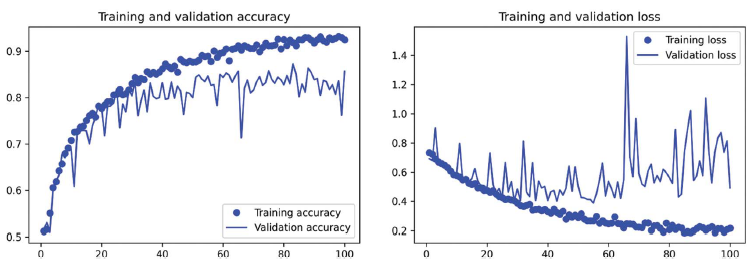

Thanks to data augmentation and dropout,
we start overfitting much later, around epochs 60–70

**Listing 8.18 Evaluating the model on the test set**

In [21]:
test_model = keras.models.load_model(
 "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 4s 50ms/step - loss: 0.4815 - accuracy: 0.8170
Test accuracy: 0.817


**4.0 Leveraging a pretrained model**
- A common and highly effective approach to deep learning on small image datasets is
to use a pretrained model. A pretrained model is a model that was previously trained on
a large dataset, typically on a large-scale image-classification task. If this original dataset
is large enough and general enough, the spatial hierarchy of features learned by
the pretrained model can effectively act as a generic model of the visual world, and
hence, its features can prove useful for many different computer vision problems,

**4.1 Feature extraction with a pretrained model**
- Feature extraction consists of using the representations learned by a previously
trained model to extract interesting features from new samples. These features are
then run through a new classifier, which is trained from scratch.

- Convnets used for image classification comprise two parts:
they start with a series of pooling and convolution layers, and they end with a densely
connected classifier. The first part is called the convolutional base of the model. In the
case of convnets, feature extraction consists of taking the convolutional base of a previously
trained network, running the new data through it, and training a new classifier
on top of the output.

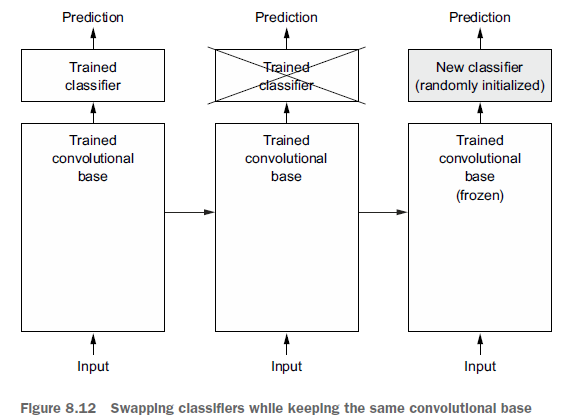

- Note that the level of generality (and therefore reusability) of the representations
extracted by specific convolution layers depends on the depth of the layer in the
model. Layers that come earlier in the model extract local, highly generic feature
maps (such as visual edges, colors, and textures), whereas layers that are higher up
extract more-abstract concepts (such as “cat ear” or “dog eye”).

- Let’s put this into practice by using the convolutional
base of the VGG16 network, trained on ImageNet, to extract interesting features
from cat and dog images, and then train a dogs-versus-cats classifier on top of
these features.

**Listing 8.19 Instantiating the VGG16 convolutional base**

In [22]:
conv_base = keras.applications.vgg16.VGG16(
 weights="imagenet",
 include_top=False,
 input_shape=(180, 180, 3))

58900480/58889256 [==============================] - 0s 0us/step


- weights specifies the weight checkpoint from which to initialize the model

- include_top refers to including (or not) the densely connected classifier on
top of the network

- input_shape is the shape of the image tensors that we’ll feed to the network.
This argument is purely optional: if we don’t pass it, the network will be able to
process inputs of any size

In [23]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

**Listing 8.20 Extracting the VGG16 features and corresponding labels**

- We’ll start by extracting features as NumPy arrays by calling the predict() method of
the conv_base model on our training, validation, and testing datasets.

In [24]:
import numpy as np
def get_features_and_labels(dataset):
 all_features = []
 all_labels = []
 for images, labels in dataset:
  preprocessed_images = keras.applications.vgg16.preprocess_input(images)
  features = conv_base.predict(preprocessed_images)
  all_features.append(features)
  all_labels.append(labels)
 return np.concatenate(all_features), np.concatenate(all_labels)
train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

In [25]:
train_features.shape

(2000, 5, 5, 512)

**Listing 8.21 Defining and training the densely connected classifier**

- we can define our densely connected classifier and train it on the data and labels that we just recorded

In [26]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs) 
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
 optimizer="rmsprop",
 metrics=["accuracy"])
callbacks = [
 keras.callbacks.ModelCheckpoint(
 filepath="feature_extraction.keras",
 save_best_only=True,
 monitor="val_loss") ]
history = model.fit(
 train_features, train_labels,
 epochs=20,
 validation_data=(val_features, val_labels),
 callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 1s 14ms/step - loss: 23.5020 - accuracy: 0.9225 - val_loss: 5.5516 - val_accuracy: 0.9700
Epoch 2/20
63/63 [==============================] - 1s 10ms/step - loss: 4.0552 - accuracy: 0.9715 - val_loss: 5.7657 - val_accuracy: 0.9690
Epoch 3/20
63/63 [==============================] - 1s 10ms/step - loss: 2.6171 - accuracy: 0.9845 - val_loss: 6.0504 - val_accuracy: 0.9750
Epoch 4/20
63/63 [==============================] - 1s 10ms/step - loss: 1.2678 - accuracy: 0.9910 - val_loss: 5.3904 - val_accuracy: 0.9680
Epoch 5/20
63/63 [==============================] - 1s 9ms/step - loss: 0.8790 - accuracy: 0.9940 - val_loss: 5.5128 - val_accuracy: 0.9730
Epoch 6/20
63/63 [==============================] - 1s 11ms/step - loss: 0.9647 - accuracy: 0.9935 - val_loss: 4.9620 - val_accuracy: 0.9810
Epoch 7/20
63/63 [==============================] - 1s 10ms/step - loss: 0.9236 - accuracy: 0.9930 - val_loss: 5.7136 - val_accuracy: 0.9790
Epoch 8/20
63

Epoch 1/20
63/63 [==============================] - 1s 14ms/step - loss: 23.5020 - accuracy: 0.9225 - val_loss: 5.5516 - val_accuracy: 0.9700

Epoch 2/20
63/63 [==============================] - 1s 10ms/step - loss: 4.0552 - accuracy: 0.9715 - val_loss: 5.7657 - val_accuracy: 0.9690

Epoch 3/20
63/63 [==============================] - 1s 10ms/step - loss: 2.6171 - accuracy: 0.9845 - val_loss: 6.0504 - val_accuracy: 0.9750

Epoch 4/20
63/63 [==============================] - 1s 10ms/step - loss: 1.2678 - accuracy: 0.9910 - val_loss: 5.3904 - val_accuracy: 0.9680

Epoch 5/20
63/63 [==============================] - 1s 9ms/step - loss: 0.8790 - accuracy: 0.9940 - val_loss: 5.5128 - val_accuracy: 0.9730

Epoch 6/20
63/63 [==============================] - 1s 11ms/step - loss: 0.9647 - accuracy: 0.9935 - val_loss: 4.9620 - val_accuracy: 0.9810

Epoch 7/20
63/63 [==============================] - 1s 10ms/step - loss: 0.9236 - accuracy: 0.9930 - val_loss: 5.7136 - val_accuracy: 0.9790

Epoch 8/20
63/63 [==============================] - 1s 9ms/step - loss: 0.1227 - accuracy: 0.9985 - val_loss: 8.8475 - val_accuracy: 0.9700

Epoch 9/20
63/63 [==============================] - 1s 10ms/step - loss: 0.1182 - accuracy: 0.9995 - val_loss: 6.2081 - val_accuracy: 0.9790

Epoch 10/20
63/63 [==============================] - 1s 10ms/step - loss: 0.1211 - accuracy: 0.9985 - val_loss: 6.3789 - val_accuracy: 0.9770

Epoch 11/20
63/63 [==============================] - 1s 9ms/step - loss: 0.1207 - accuracy: 0.9990 - val_loss: 6.3937 - val_accuracy: 0.9760

Epoch 12/20
63/63 [==============================] - 1s 9ms/step - loss: 0.2355 - accuracy: 0.9970 - val_loss: 5.1347 - val_accuracy: 0.9790

Epoch 13/20
63/63 [==============================] - 1s 11ms/step - loss: 0.3932 - accuracy: 0.9980 - val_loss: 4.5200 - val_accuracy: 0.9840

Epoch 14/20
63/63 [==============================] - 1s 9ms/step - loss: 4.5621e-21 - accuracy: 1.0000 - val_loss: 4.5200 - val_accuracy: 0.9840

Epoch 15/20
63/63 [==============================] - 1s 10ms/step - loss: 0.1564 - accuracy: 0.9980 - val_loss: 6.2539 - val_accuracy: 0.9800

Epoch 16/20
63/63 [==============================] - 1s 9ms/step - loss: 0.0492 - accuracy: 0.9990 - val_loss: 5.2948 - val_accuracy: 0.9760

Epoch 17/20
63/63 [==============================] - 1s 9ms/step - loss: 0.2403 - accuracy: 0.9975 - val_loss: 5.7183 - val_accuracy: 0.9810

Epoch 18/20
63/63 [==============================] - 1s 11ms/step - loss: 0.6646 - accuracy: 0.9965 - val_loss: 4.0286 - val_accuracy: 0.9820

Epoch 19/20
63/63 [==============================] - 1s 9ms/step - loss: 0.0295 - accuracy: 0.9990 - val_loss: 4.4027 - val_accuracy: 0.9810

Epoch 20/20
63/63 [==============================] - 1s 9ms/step - loss: 0.1614 - accuracy: 0.9980 - val_loss: 4.8397 - val_accuracy: 0.9790

**Listing 8.22 Plotting the results**

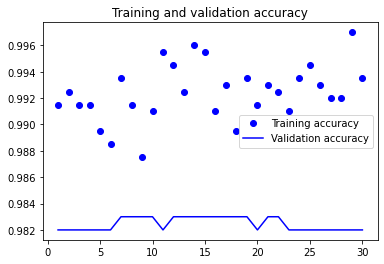

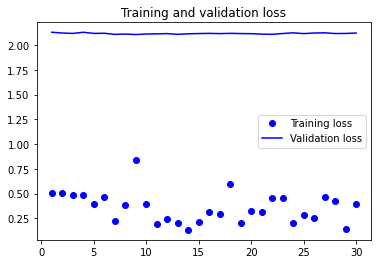

In [42]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Listing 8.23 Instantiating and freezing the VGG16 convolutional base**

- The second technique I mentioned for doing feature extraction,
which is much slower and more expensive, but which allows us to use data augmentation
during training: creating a model that chains the conv_base with a new dense
classifier, and training it end to end on the inputs.

- we will first freeze the convolutional base. Freezing a layer or set of
layers means preventing their weights from being updated during training. If we don’t
do this, the representations that were previously learned by the convolutional base will
be modified during training.

In [28]:
conv_base = keras.applications.vgg16.VGG16(
 weights="imagenet",
 include_top=False)
conv_base.trainable = False

Setting trainable to False empties the list of trainable weights of the layer or model.

**Listing 8.24 Printing the list of trainable weights before and after freezing**

In [29]:
conv_base.trainable = True
print("This is the number of trainable weights "
 "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [30]:
conv_base.trainable = False
print("This is the number of trainable weights "
 "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Listing 8.25 Adding a data augmentation stage and a classifier to the convolutional base**

Now we can create a new model that chains together

1 A data augmentation stage

2 Our frozen convolutional base

3 A dense classifier

In [31]:
data_augmentation = keras.Sequential(
 [
 layers.RandomFlip("horizontal"),
 layers.RandomRotation(0.1),
 layers.RandomZoom(0.2),
 ]
)
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs) 
x = keras.applications.vgg16.preprocess_input(x) 
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
 optimizer="rmsprop",
 metrics=["accuracy"])

In [33]:
callbacks = [
 keras.callbacks.ModelCheckpoint(
 filepath="feature_extraction_with_data_augmentation.keras",
 save_best_only=True,
 monitor="val_loss") ]
 

In [34]:
history = model.fit(
 train_dataset,
 epochs=50,
 validation_data=validation_dataset,
 callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 23s 335ms/step - loss: 19.7834 - accuracy: 0.8890 - val_loss: 5.7115 - val_accuracy: 0.9580
Epoch 2/50
63/63 [==============================] - 21s 333ms/step - loss: 7.2522 - accuracy: 0.9425 - val_loss: 4.9724 - val_accuracy: 0.9700
Epoch 3/50
63/63 [==============================] - 21s 329ms/step - loss: 5.6193 - accuracy: 0.9555 - val_loss: 6.2184 - val_accuracy: 0.9620
Epoch 4/50
63/63 [==============================] - 21s 332ms/step - loss: 4.5398 - accuracy: 0.9660 - val_loss: 2.5669 - val_accuracy: 0.9820
Epoch 5/50
63/63 [==============================] - 21s 329ms/step - loss: 4.3169 - accuracy: 0.9645 - val_loss: 3.7548 - val_accuracy: 0.9770
Epoch 6/50
63/63 [==============================] - 21s 328ms/step - loss: 4.3233 - accuracy: 0.9625 - val_loss: 5.5626 - val_accuracy: 0.9660
Epoch 7/50
63/63 [==============================] - 21s 328ms/step - loss: 3.1793 - accuracy: 0.9710 - val_loss: 7.7500 - val_accuracy: 0.956

Epoch 1/50
63/63 [==============================] - 23s 335ms/step - loss: 19.7834 - accuracy: 0.8890 - val_loss: 5.7115 - val_accuracy: 0.9580

Epoch 2/50
63/63 [==============================] - 21s 333ms/step - loss: 7.2522 - accuracy: 0.9425 - val_loss: 4.9724 - val_accuracy: 0.9700

Epoch 3/50
63/63 [==============================] - 21s 329ms/step - loss: 5.6193 - accuracy: 0.9555 - val_loss: 6.2184 - val_accuracy: 0.9620

Epoch 4/50
63/63 [==============================] - 21s 332ms/step - loss: 4.5398 - accuracy: 0.9660 - val_loss: 2.5669 - val_accuracy: 0.9820

Epoch 5/50
63/63 [==============================] - 21s 329ms/step - loss: 4.3169 - accuracy: 0.9645 - val_loss: 3.7548 - val_accuracy: 0.9770

Epoch 6/50
63/63 [==============================] - 21s 328ms/step - loss: 4.3233 - accuracy: 0.9625 - val_loss: 5.5626 - val_accuracy: 0.9660

Epoch 7/50
63/63 [==============================] - 21s 328ms/step - loss: 3.1793 - accuracy: 0.9710 - val_loss: 7.7500 - val_accuracy: 0.9560

Epoch 8/50
63/63 [==============================] - 21s 328ms/step - loss: 2.2239 - accuracy: 0.9725 - val_loss: 3.3989 - val_accuracy: 0.9800

Epoch 9/50
63/63 [==============================] - 21s 328ms/step - loss: 2.6665 - accuracy: 0.9735 - val_loss: 3.7665 - val_accuracy: 0.9800

Epoch 10/50
63/63 [==============================] - 21s 328ms/step - loss: 2.2564 - accuracy: 0.9780 - val_loss: 3.0855 - val_accuracy: 0.9830

Epoch 11/50
63/63 [==============================] - 21s 328ms/step - loss: 1.7192 - accuracy: 0.9785 - val_loss: 3.7672 - val_accuracy: 0.9790

Epoch 12/50
63/63 [==============================] - 21s 328ms/step - loss: 1.7349 - accuracy: 0.9860 - val_loss: 5.7442 - val_accuracy: 0.9650

Epoch 13/50
63/63 [==============================] - 21s 329ms/step - loss: 2.2642 - accuracy: 0.9770 - val_loss: 3.4420 - val_accuracy: 0.9760

Epoch 14/50
63/63 [==============================] - 21s 328ms/step - loss: 1.8277 - accuracy: 0.9780 - val_loss: 3.6895 - val_accuracy: 0.9780

Epoch 15/50
63/63 [==============================] - 21s 332ms/step - loss: 1.6681 - accuracy: 0.9775 - val_loss: 2.5171 - val_accuracy: 0.9830

Epoch 16/50
63/63 [==============================] - 21s 327ms/step - loss: 1.6540 - accuracy: 0.9840 - val_loss: 3.1154 - val_accuracy: 0.9840

Epoch 17/50
63/63 [==============================] - 21s 328ms/step - loss: 1.7454 - accuracy: 0.9835 - val_loss: 3.1554 - val_accuracy: 0.9800

Epoch 18/50
63/63 [==============================] - 21s 329ms/step - loss: 2.4271 - accuracy: 0.9795 - val_loss: 3.2283 - val_accuracy: 0.9760

Epoch 19/50
63/63 [==============================] - 21s 329ms/step - loss: 1.9244 - accuracy: 0.9765 - val_loss: 2.8391 - val_accuracy: 0.9790

Epoch 20/50
63/63 [==============================] - 21s 329ms/step - loss: 1.8646 - accuracy: 0.9770 - val_loss: 3.9806 - val_accuracy: 0.9740

Epoch 21/50
63/63 [==============================] - 21s 329ms/step - loss: 1.7795 - accuracy: 0.9785 - val_loss: 3.5808 - val_accuracy: 0.9760

Epoch 22/50
63/63 [==============================] - 21s 332ms/step - loss: 1.5267 - accuracy: 0.9825 - val_loss: 2.2553 - val_accuracy: 0.9800

Epoch 23/50
63/63 [==============================] - 21s 332ms/step - loss: 0.9389 - accuracy: 0.9850 - val_loss: 2.1621 - val_accuracy: 0.9760

Epoch 24/50
63/63 [==============================] - 21s 328ms/step - loss: 0.5629 - accuracy: 0.9855 - val_loss: 2.3014 - val_accuracy: 0.9800

Epoch 25/50
63/63 [==============================] - 21s 328ms/step - loss: 0.6009 - accuracy: 0.9855 - val_loss: 2.6577 - val_accuracy: 0.9820

Epoch 26/50
63/63 [==============================] - 21s 329ms/step - loss: 0.9072 - accuracy: 0.9810 - val_loss: 2.5267 - val_accuracy: 0.9790

Epoch 27/50
63/63 [==============================] - 21s 332ms/step - loss: 0.6408 - accuracy: 0.9890 - val_loss: 2.1151 - val_accuracy: 0.9760

Epoch 28/50
63/63 [==============================] - 21s 327ms/step - loss: 1.1601 - accuracy: 0.9850 - val_loss: 2.5616 - val_accuracy: 0.9720

Epoch 29/50
63/63 [==============================] - 21s 328ms/step - loss: 0.5945 - accuracy: 0.9880 - val_loss: 2.5759 - val_accuracy: 0.9790

Epoch 30/50
63/63 [==============================] - 21s 328ms/step - loss: 0.7211 - accuracy: 0.9885 - val_loss: 2.7104 - val_accuracy: 0.9770

Epoch 31/50
63/63 [==============================] - 21s 331ms/step - loss: 0.8223 - accuracy: 0.9830 - val_loss: 1.9603 - val_accuracy: 0.9830

Epoch 32/50
63/63 [==============================] - 21s 331ms/step - loss: 0.7288 - accuracy: 0.9850 - val_loss: 1.7880 - val_accuracy: 0.9820

Epoch 33/50
63/63 [==============================] - 21s 333ms/step - loss: 0.8304 - accuracy: 0.9845 - val_loss: 1.5203 - val_accuracy: 0.9840

Epoch 34/50
63/63 [==============================] - 21s 328ms/step - loss: 0.7591 - accuracy: 0.9850 - val_loss: 2.0138 - val_accuracy: 0.9750

Epoch 35/50
63/63 [==============================] - 21s 327ms/step - loss: 0.9688 - accuracy: 0.9850 - val_loss: 1.5566 - val_accuracy: 0.9790

Epoch 36/50
63/63 [==============================] - 21s 327ms/step - loss: 0.6267 - accuracy: 0.9865 - val_loss: 1.7933 - val_accuracy: 0.9790

Epoch 37/50
63/63 [==============================] - 21s 327ms/step - loss: 0.4519 - accuracy: 0.9890 - val_loss: 1.9851 - val_accuracy: 0.9810

Epoch 38/50
63/63 [==============================] - 21s 333ms/step - loss: 0.5010 - accuracy: 0.9875 - val_loss: 1.4896 - val_accuracy: 0.9840

Epoch 39/50
63/63 [==============================] - 21s 328ms/step - loss: 0.3041 - accuracy: 0.9905 - val_loss: 1.4999 - val_accuracy: 0.9830

Epoch 40/50
63/63 [==============================] - 21s 327ms/step - loss: 0.3313 - accuracy: 0.9910 - val_loss: 1.7906 - val_accuracy: 0.9810

Epoch 41/50
63/63 [==============================] - 21s 328ms/step - loss: 0.2962 - accuracy: 0.9920 - val_loss: 1.5337 - val_accuracy: 0.9840

Epoch 42/50
63/63 [==============================] - 21s 327ms/step - loss: 0.6746 - accuracy: 0.9860 - val_loss: 2.3331 - val_accuracy: 0.9760

Epoch 43/50
63/63 [==============================] - 21s 327ms/step - loss: 0.4497 - accuracy: 0.9875 - val_loss: 2.2207 - val_accuracy: 0.9780

Epoch 44/50
63/63 [==============================] - 21s 327ms/step - loss: 0.3687 - accuracy: 0.9895 - val_loss: 1.9511 - val_accuracy: 0.9810

Epoch 45/50
63/63 [==============================] - 21s 327ms/step - loss: 0.4027 - accuracy: 0.9880 - val_loss: 2.3480 - val_accuracy: 0.9790

Epoch 46/50
63/63 [==============================] - 21s 327ms/step - loss: 0.3727 - accuracy: 0.9920 - val_loss: 2.5784 - val_accuracy: 0.9750

Epoch 47/50
63/63 [==============================] - 21s 327ms/step - loss: 0.6716 - accuracy: 0.9855 - val_loss: 2.1225 - val_accuracy: 0.9790

Epoch 48/50
63/63 [==============================] - 21s 328ms/step - loss: 0.5212 - accuracy: 0.9890 - val_loss: 2.7999 - val_accuracy: 0.9790

Epoch 49/50
63/63 [==============================] - 21s 327ms/step - loss: 0.7563 - accuracy: 0.9865 - val_loss: 2.7366 - val_accuracy: 0.9800

Epoch 50/50
63/63 [==============================] - 21s 328ms/step - loss: 0.6299 - accuracy: 0.9875 - val_loss: 2.1341 - val_accuracy: 0.9820

**Listing 8.26 Evaluating the model on the test set**

In [36]:
test_model = keras.models.load_model(
 "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 14s 208ms/step - loss: 2.4051 - accuracy: 0.9745
Test accuracy: 0.975


**5.0 Fine-tuning a pretrained model**

- Another widely used technique for model reuse,
complementary to feature extraction, is fine-tuning

- Fine-tuning consists of unfreezing
a few of the top layers of a frozen model base used
for feature extraction, and jointly training both the
newly added part of the model and these top layers.

- it’s only possible to fine-tune the top
layers of the convolutional base once the classifier on
top has already been trained
- If the classifier isn’t
already trained, the error signal propagating
through the network during training will be too
large, and the representations previously learned by
the layers being fine-tuned will be destroyed.

Thus
the steps for fine-tuning a network are as follows:

1 Add our custom network on top of an
already-trained base network.

2 Freeze the base network.

3 Train the part we added.

4 Unfreeze some layers in the base network

5 Jointly train both these layers and the part we
added.


In [38]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

**Listing 8.27 Freezing all layers until the fourth from the last**

In [37]:
conv_base = keras.applications.vgg16.VGG16(
 weights="imagenet",
 include_top=False)
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
 layer.trainable = False

We’ll fine-tune the last three convolutional layers, which means all layers up to block4_
pool should be frozen, and the layers block5_conv1, block5_conv2, and block5_conv3
should be trainable.

Why not fine-tune more layers?

- Earlier layers in the convolutional base encode more generic, reusable features,
whereas layers higher up encode more specialized features. It’s more useful to
fine-tune the more specialized features.

- The more parameters you’re training, the more you’re at risk of overfitting.

**Listing 8.28 Fine-tuning the model**

Now we can begin fine-tuning the model. We’ll do this with the **RMSprop optimizer,**
using a very low learning rate. The reason for using a low learning rate is that we want to
limit the magnitude of the modifications we make to the representations of the three
layers we’re fine-tuning. Updates that are too large may harm these representations.

In [39]:
model.compile(loss="binary_crossentropy",
 optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
 metrics=["accuracy"])
callbacks = [
 keras.callbacks.ModelCheckpoint(
 filepath="fine_tuning.keras",
 save_best_only=True,
 monitor="val_loss") ]

In [40]:
history = model.fit(
 train_dataset,
 epochs=30,
 validation_data=validation_dataset,
 callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 23s 333ms/step - loss: 0.5045 - accuracy: 0.9915 - val_loss: 2.1299 - val_accuracy: 0.9820
Epoch 2/30
63/63 [==============================] - 21s 331ms/step - loss: 0.5044 - accuracy: 0.9925 - val_loss: 2.1219 - val_accuracy: 0.9820
Epoch 3/30
63/63 [==============================] - 21s 331ms/step - loss: 0.4840 - accuracy: 0.9915 - val_loss: 2.1181 - val_accuracy: 0.9820
Epoch 4/30
63/63 [==============================] - 21s 328ms/step - loss: 0.4836 - accuracy: 0.9915 - val_loss: 2.1296 - val_accuracy: 0.9820
Epoch 5/30
63/63 [==============================] - 21s 328ms/step - loss: 0.3996 - accuracy: 0.9895 - val_loss: 2.1182 - val_accuracy: 0.9820
Epoch 6/30
63/63 [==============================] - 21s 328ms/step - loss: 0.4648 - accuracy: 0.9885 - val_loss: 2.1195 - val_accuracy: 0.9820
Epoch 7/30
63/63 [==============================] - 21s 332ms/step - loss: 0.2270 - accuracy: 0.9935 - val_loss: 2.1085 - val_accuracy: 0.9830

Epoch 1/30
63/63 [==============================] - 23s 333ms/step - loss: 0.5045 - accuracy: 0.9915 - val_loss: 2.1299 - val_accuracy: 0.9820

Epoch 2/30
63/63 [==============================] - 21s 331ms/step - loss: 0.5044 - accuracy: 0.9925 - val_loss: 2.1219 - val_accuracy: 0.9820

Epoch 3/30
63/63 [==============================] - 21s 331ms/step - loss: 0.4840 - accuracy: 0.9915 - val_loss: 2.1181 - val_accuracy: 0.9820

Epoch 4/30
63/63 [==============================] - 21s 328ms/step - loss: 0.4836 - accuracy: 0.9915 - val_loss: 2.1296 - val_accuracy: 0.9820

Epoch 5/30
63/63 [==============================] - 21s 328ms/step - loss: 0.3996 - accuracy: 0.9895 - val_loss: 2.1182 - val_accuracy: 0.9820

Epoch 6/30
63/63 [==============================] - 21s 328ms/step - loss: 0.4648 - accuracy: 0.9885 - val_loss: 2.1195 - val_accuracy: 0.9820

Epoch 7/30
63/63 [==============================] - 21s 332ms/step - loss: 0.2270 - accuracy: 0.9935 - val_loss: 2.1085 - val_accuracy: 0.9830

Epoch 8/30
63/63 [==============================] - 21s 329ms/step - loss: 0.3866 - accuracy: 0.9915 - val_loss: 2.1114 - val_accuracy: 0.9830

Epoch 9/30
63/63 [==============================] - 21s 333ms/step - loss: 0.8347 - accuracy: 0.9875 - val_loss: 2.1065 - val_accuracy: 0.9830

Epoch 10/30
63/63 [==============================] - 21s 328ms/step - loss: 0.3957 - accuracy: 0.9910 - val_loss: 2.1119 - val_accuracy: 0.9830

Epoch 11/30
63/63 [==============================] - 21s 328ms/step - loss: 0.1914 - accuracy: 0.9955 - val_loss: 2.1135 - val_accuracy: 0.9820

Epoch 12/30
63/63 [==============================] - 21s 328ms/step - loss: 0.2435 - accuracy: 0.9945 - val_loss: 2.1161 - val_accuracy: 0.9830

Epoch 13/30
63/63 [==============================] - 21s 328ms/step - loss: 0.2036 - accuracy: 0.9925 - val_loss: 2.1086 - val_accuracy: 0.9830

Epoch 14/30
63/63 [==============================] - 21s 327ms/step - loss: 0.1332 - accuracy: 0.9960 - val_loss: 2.1144 - val_accuracy: 0.9830

Epoch 15/30
63/63 [==============================] - 21s 326ms/step - loss: 0.2171 - accuracy: 0.9955 - val_loss: 2.1165 - val_accuracy: 0.9830

Epoch 16/30
63/63 [==============================] - 21s 327ms/step - loss: 0.3178 - accuracy: 0.9910 - val_loss: 2.1184 - val_accuracy: 0.9830

Epoch 17/30
63/63 [==============================] - 21s 328ms/step - loss: 0.2918 - accuracy: 0.9930 - val_loss: 2.1160 - val_accuracy: 0.9830

Epoch 18/30
63/63 [==============================] - 21s 327ms/step - loss: 0.5985 - accuracy: 0.9895 - val_loss: 2.1187 - val_accuracy: 0.9830

Epoch 19/30
63/63 [==============================] - 21s 328ms/step - loss: 0.2042 - accuracy: 0.9935 - val_loss: 2.1164 - val_accuracy: 0.9830

Epoch 20/30
63/63 [==============================] - 21s 329ms/step - loss: 0.3285 - accuracy: 0.9915 - val_loss: 2.1154 - val_accuracy: 0.9820

Epoch 21/30
63/63 [==============================] - 21s 329ms/step - loss: 0.3155 - accuracy: 0.9930 - val_loss: 2.1108 - val_accuracy: 0.9830

Epoch 22/30
63/63 [==============================] - 21s 329ms/step - loss: 0.4508 - accuracy: 0.9925 - val_loss: 2.1089 - val_accuracy: 0.9830

Epoch 23/30
63/63 [==============================] - 21s 328ms/step - loss: 0.4508 - accuracy: 0.9910 - val_loss: 2.1171 - val_accuracy: 0.9820

Epoch 24/30
63/63 [==============================] - 21s 327ms/step - loss: 0.2031 - accuracy: 0.9935 - val_loss: 2.1239 - val_accuracy: 0.9820

Epoch 25/30
63/63 [==============================] - 21s 327ms/step - loss: 0.2887 - accuracy: 0.9945 - val_loss: 2.1160 - val_accuracy: 0.9820

Epoch 26/30
63/63 [==============================] - 21s 329ms/step - loss: 0.2551 - accuracy: 0.9930 - val_loss: 2.1221 - val_accuracy: 0.9820

Epoch 27/30
63/63 [==============================] - 21s 329ms/step - loss: 0.4648 - accuracy: 0.9920 - val_loss: 2.1243 - val_accuracy: 0.9820

Epoch 28/30
63/63 [==============================] - 21s 329ms/step - loss: 0.4214 - accuracy: 0.9920 - val_loss: 2.1168 - val_accuracy: 0.9820

Epoch 29/30
63/63 [==============================] - 21s 328ms/step - loss: 0.1402 - accuracy: 0.9970 - val_loss: 2.1178 - val_accuracy: 0.9820

Epoch 30/30
63/63 [==============================] - 21s 329ms/step - loss: 0.3919 - accuracy: 0.9935 - val_loss: 2.1217 - val_accuracy: 0.9820

**Evaluate this model on the test data:**

In [41]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset) 
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 15s 213ms/step - loss: 2.2613 - accuracy: 0.9755
Test accuracy: 0.975
